In [1]:
from os import listdir
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np

from matplotlib.mlab import PCA
import matplotlib.cm as cm

from sklearn import neighbors as knn
from sklearn.metrics import confusion_matrix as cm

%matplotlib inline

In [2]:
def plot_confusion_matrix(confmat, labels_names, ax=None):
    pl.figure()
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap='jet')

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=10, color='white')
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)
    pl.show()

In [106]:
n_samples_per_slice = 10
slice_overlap = 5

# get the min index and max index to consider when we want to skip x slices at the begining or the end of the file
def first_slices_index(x):
    return x*(n_samples_per_slice - slice_overlap)
def last_slices_index(x, last_index):    # last_index = len(data[f]['timestamp'])-n_samples_per_slice
    return last_index + x*(slice_overlap - n_samples_per_slice)

def slice_generation(data):
    storage = {}
    for f in data:
        # skip lud data, for the moment we only consider one person
        if 'lud' in f:
            continue
        
        # iterate through the file to generate slices
        for start_sample in range(0, len(data[f]['timestamp'])-n_samples_per_slice, slice_overlap):
            df_temp = data[f].iloc[start_sample:start_sample+n_samples_per_slice, :]
            df_temp = df_temp.drop(columns='timestamp')
            
            # manual labelisation
            if f=='abdos_f5_manon1.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='abdos_f5_manon1.csv':
                label = 'abdos'
            if f=='abdos_f5_manon2.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='abdos_f5_manon2.csv':
                label = 'abdos'
            if f=='abdos_f5_manon3.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='abdos_f5_manon3.csv':
                label = 'abdos'
            if f=='abdos_f5_manon4_valid.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(3, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='abdos_f5_manon4_valid.csv':
                label = 'abdos'
            if f=='corde_f5_manon1.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='corde_f5_manon1.csv':
                label = 'corde'
            if f=='corde_f5_manon2.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='corde_f5_manon2.csv':
                label = 'corde'
            if f=='corde_f5_manon3.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(5, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='corde_f5_manon3.csv':
                label = 'corde'
            if f=='corde_f5_manon4_valid.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='corde_f5_manon4_valid.csv':
                label = 'corde'
            if f=='dorsaux_f5_manon1.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='dorsaux_f5_manon1.csv':
                label = 'dorsaux'
            if f=='dorsaux_f5_manon2.csv' and (start_sample <= first_slices_index(0) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='dorsaux_f5_manon2.csv':
                label = 'dorsaux'
            if f=='dorsaux_f5_manon3.csv' and (start_sample <= first_slices_index(0) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='dorsaux_f5_manon3.csv':
                label = 'dorsaux'
            if f=='dorsaux_f5_manon4_valid.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(5, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='dorsaux_f5_manon4_valid.csv':
                label = 'dorsaux'
            if f=='squats_f5_manon1.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(1, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='squats_f5_manon1.csv':
                label = 'squats'
            if f=='squats_f5_manon2.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(2, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='squats_f5_manon2.csv':
                label = 'squats'
            if f=='squats_f5_manon3.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='squats_f5_manon3.csv':
                label = 'squats'
            if f=='squats_f5_manon4_valid.csv' and (start_sample <= first_slices_index(1) or start_sample >= last_slices_index(0, len(data[f]['timestamp'])-n_samples_per_slice)):
                label = 'idle'
            elif f=='squats_f5_manon4_valid.csv':
                label = 'squats'
                
            if label in storage.keys():          # if the label already exists in the dictionary
                temp = storage[label]
                temp.append(df_temp)           # append the new geture to the list
                storage[label] = temp
            else:
                storage[label] = [df_temp,] # otherwise, create a list with one element
                
    return storage

In [4]:
path = "./selected_raw_data/"

## Import data
Steps for each file :
- print filename (useful to access data later)
- create a dataframe from the values inside the file
- clean timestamp in order to get a column indicating the elapsed time in seconds

In [159]:
data_test ={}
data_train ={}
for f in listdir(path):
    if "4" in f:
        print("Data for validation : ",f)
        data_test[f] = pd.read_csv(path+f)
        start_time = data_test[f]["timestamp"][0]
        data_test[f]["timestamp"] = (data_test[f]["timestamp"]-start_time)/1000
    else :
        print("Data for training : ",f)
        data_train[f] = pd.read_csv(path+f)
        start_time = data_train[f]["timestamp"][0]
        data_train[f]["timestamp"] = (data_train[f]["timestamp"]-start_time)/1000

Data for training :  abdos_f5_lud.csv
Data for training :  abdos_f5_manon1.csv
Data for training :  abdos_f5_manon2.csv
Data for training :  abdos_f5_manon3.csv
Data for validation :  abdos_f5_manon4.csv
Data for training :  corde_f5_manon1.csv
Data for training :  corde_f5_manon2.csv
Data for training :  corde_f5_manon3.csv
Data for validation :  corde_f5_manon4.csv
Data for training :  dorsaux_f5_lud.csv
Data for training :  dorsaux_f5_manon1.csv
Data for training :  dorsaux_f5_manon2.csv
Data for training :  dorsaux_f5_manon3.csv
Data for validation :  dorsaux_f5_manon4.csv
Data for training :  squats_f5_lud.csv
Data for training :  squats_f5_manon1.csv
Data for training :  squats_f5_manon2.csv
Data for training :  squats_f5_manon3.csv
Data for validation :  squats_f5_manon4.csv


##  Plots
### Abdos

In [50]:
data = z = {**data_test, **data_train} # gather all the data just for the plots

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


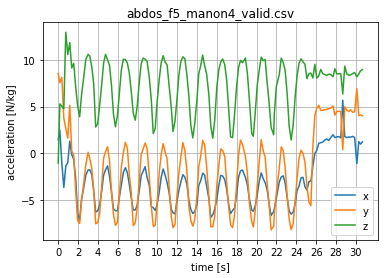

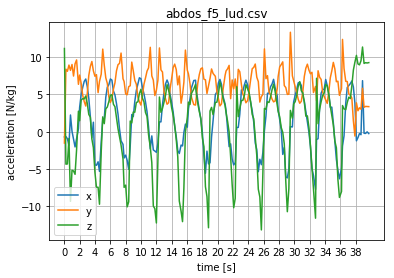

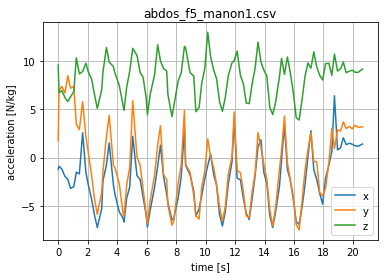

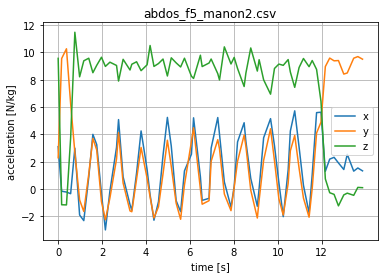

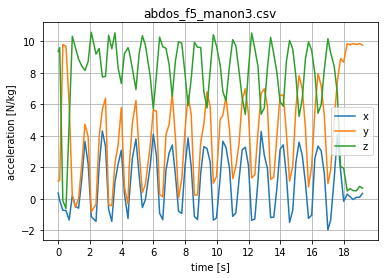

In [51]:
for f in data:
    if "abdos" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))

### Squats

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


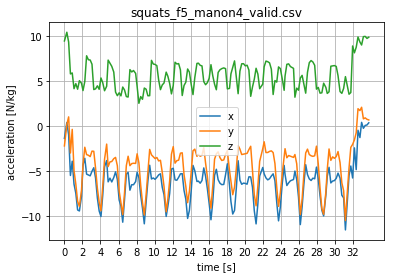

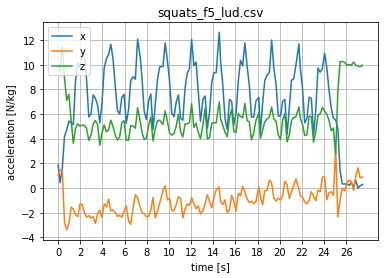

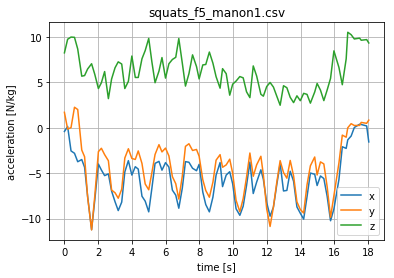

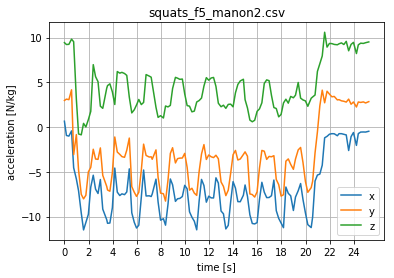

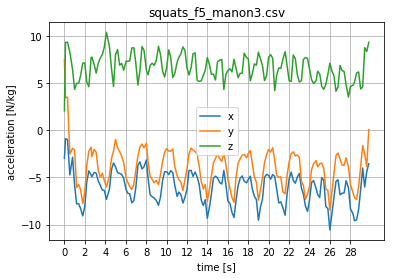

In [32]:
for f in data:
    if "squats" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))

### Dorsaux

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


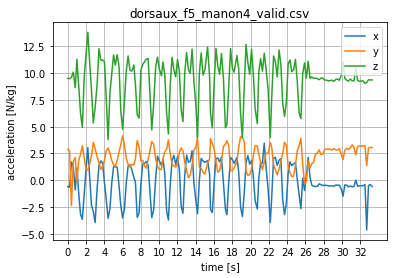

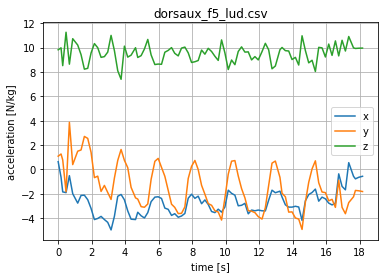

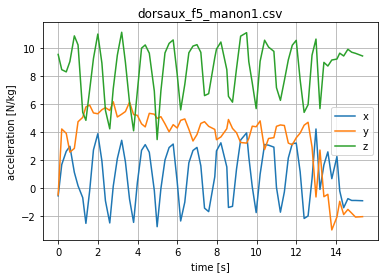

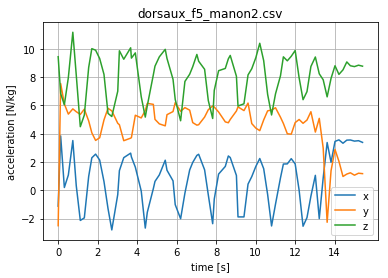

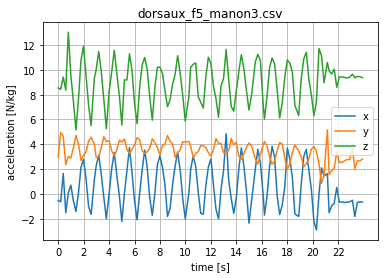

In [33]:
for f in data:
    if "dorsaux" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))

### Sauts à la corde

c:\users\ludivine\anaconda2\envs\server\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


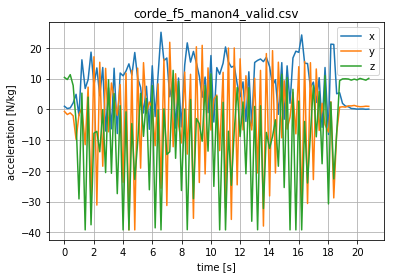

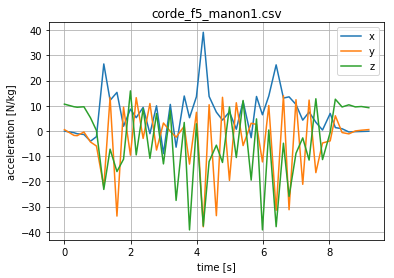

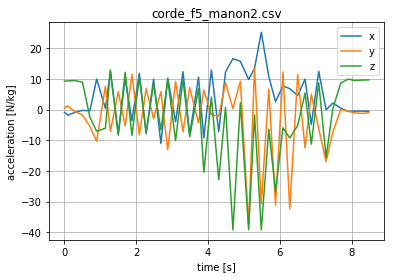

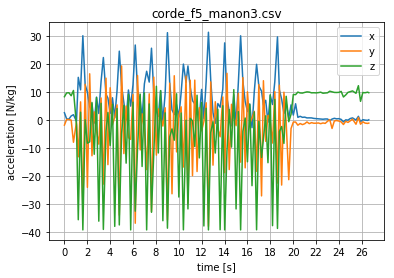

In [34]:
for f in data:
    if "corde" in f:
        data[f].plot(x="timestamp", y=['x', 'y', 'z'], kind='line', title=f, grid=True)
        pl.ylabel('acceleration [N/kg]')
        pl.xlabel('time [s]')
        pl.xticks(np.arange(min(data[f]["timestamp"]), max(data[f]["timestamp"]), step=2))

# Slices generation
Découpage des fichiers en tranches de 10 points, ce qui correspond à environ 2 secondes.

Stockage dans un dictionnaire, avec les différents exercices comme clés.

In [107]:
storage_train = slice_generation(data_train)
storage_test = slice_generation(data_test)

In [108]:
storage_train.keys()

dict_keys(['idle', 'abdos', 'corde', 'dorsaux', 'squats'])

In [109]:
for label in storage_train.keys():             # stack the recordings with the same label
    storage_train[label] = np.dstack(storage_train[label])
    print('label', label, ':', storage_train[label].shape[2], 'samples')

# the resulting recordings shape is [n_samples x 6 x n_repetitions]

label idle : 35 samples
label abdos : 42 samples
label corde : 28 samples
label dorsaux : 43 samples
label squats : 60 samples


In [150]:
for label in storage_test.keys():             # stack the recordings with the same label
    storage_test[label] = np.dstack(storage_test[label])
    print('label', label, ':', storage_test[label].shape[2], 'samples')

label idle : 10 samples
label abdos : 10 samples
label corde : 10 samples
label dorsaux : 10 samples
label squats : 10 samples


# Compute the features
À partir de là, on entre dans le ML... Tout est repris et adapté à partir du labo 5. On pourra pas la suite être plus créatives et tester d'autres algorithmes de classification

In [151]:
features_train = {}
for label in storage_train.keys():
    #features_train[label] = np.mean(storage_train[label], axis=0).T
    #features_train[label] = np.std(storage_train[label], axis=0).T
    features_train[label] = np.hstack((np.mean(storage_train[label], axis=0).T, np.std(storage_train[label], axis=0).T))
    
# the resulting features shape is [n_repetitions x n_features]

# Compilation of a single dataset
Les données sont séparées en input = features calculées à partir des valeurs retournées par l'accéléromètre de la montre, et output = label de l'exercice

In [152]:
data_train_input = []
data_train_output = []
for label in features_train.keys():
    data_train_input.append(features_train[label])
    data_train_output.append(np.repeat(label, features_train[label].shape[0]))
data_train_input = np.vstack(data_train_input)
data_train_output = np.hstack(data_train_output)

# Visualisation with PCA
Si on importe les données de plusieurs personnes ou d'une seule, on voit bien que chaque personne exécute ses mouvements différemment...

In [153]:
results_train_pca = PCA(data_train_input)

First two components keep 90.87977939751337 percent of the total variance


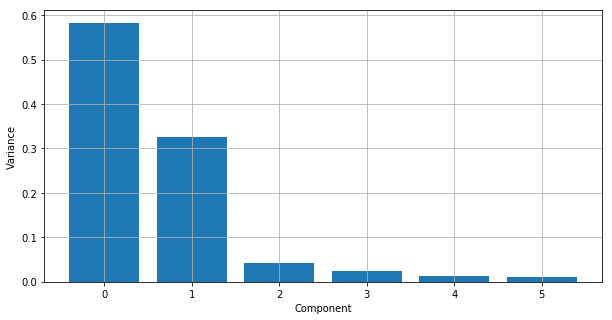

In [154]:
pl.figure(figsize=(10,5))
pl.bar(x=np.arange(len(results_train_pca.fracs)), height=results_train_pca.fracs)
pl.ylabel('Variance')
pl.xlabel('Component')
pl.grid()

print('First two components keep', 100*(results_train_pca.fracs[0] + results_train_pca.fracs[1]), 'percent of the total variance')

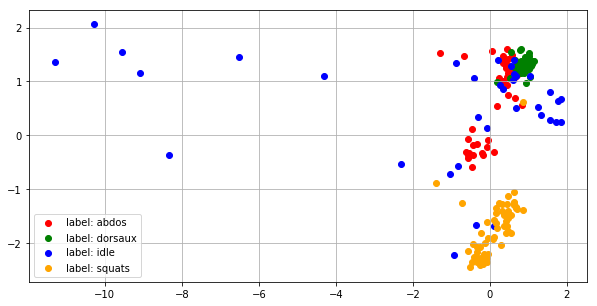

In [155]:
colors = ['red', 'green', 'blue', 'orange', 'magenta', 'cyan']

labels = storage_train.keys()

pl.figure(figsize=(10,5))
for i,l in enumerate(sorted(labels)):
    this_labels = results_train_pca.Y[data_train_output==l,:]
    pl.scatter(this_labels[:,0], this_labels[:,1], c=colors[i], label='label: '+l)
pl.legend()
pl.grid()

# Classification

In [156]:
#convert output values to int
label_dict = {'abdos':1, 'squats':2, 'dorsaux':3, 'corde':4, 'idle':5}
data_train_output_num = -1 * np.ones(len(data_train_output))
for i, val in enumerate(data_train_output):
    data_train_output_num[i] = label_dict[val]

In [157]:
N_NEIGHBORS = 3

# leave-one-out cross-validation:
# given N observations, use N-1 observations to fit the model
# and classify the observation that was not used for fitting
    

model_classification = -1 * np.ones(len(data_train_output))

for v_index in range(len(data_output)):
    data_input_calib = np.delete(data_train_input, v_index, axis=0)
    data_input_test = data_train_input[v_index:v_index+1, :]
    
    data_output_calib = np.delete(data_train_output_num, v_index)
    data_output_test = data_train_output_num[v_index]
    
    model = knn.KNeighborsClassifier(N_NEIGHBORS, 'uniform')
#    model = knn.KNeighborsClassifier(N_NEIGHBORS, 'distance')
    model.fit(data_input_calib, data_output_calib)
    
    model_classification[v_index] = model.predict(data_input_test)

# Résultats

In [147]:
# accuracy
acc = 100 * np.sum(model_classification == data_output_num) / len(data_output)
print('accuracy: ', acc, '%')

accuracy:  84.13461538461539 %


In [148]:
# confusion matrix
confusion_matrix = cm(data_output_num, model_classification)

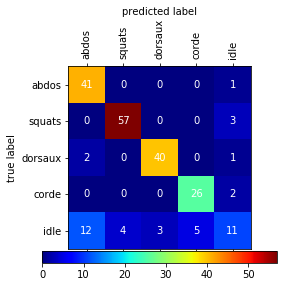

In [149]:
plot_confusion_matrix(confusion_matrix, list(label_dict.keys()))